Model From Strach 01

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_tuner import Hyperband
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import Hyperband

In [3]:
# Define image dimensions and paths
img_height, img_width = 128, 128
training_path = '/content/drive/MyDrive/Brain Tumor MRI Dataset/Training'
testing_path = '/content/drive/MyDrive/Brain Tumor MRI Dataset/Testing'

# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_m1 = train_datagen.flow_from_directory(
    training_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_m1= train_datagen.flow_from_directory(
    training_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_m1 = test_datagen.flow_from_directory(
    testing_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Brain Tumor MRI Dataset/Training'

In [4]:
# Define the model-building function for Hyperband
def build_model(hp):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Max-Pooling Layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Dropout Layer
    model.add(layers.Dropout(0.25))

    # Flattening
    model.add(layers.Flatten())

    # Fully connected layer
    model.add(layers.Dense(128, activation='relu'))

    # Another Dropout Layer
    model.add(layers.Dropout(0.5))

    # Output layer for 4 classes
    model.add(layers.Dense(4, activation='softmax'))

    # Hyperparameters for the optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', [0.0001, 0.00001])

    # Compile the model with chosen optimizer and learning rate
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model



In [5]:
# Initialize the Hyperband tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='/content/drive/MyDrive/umar',
    project_name='strach_m1'
)

# Early stopping callback to stop training when no improvement is observed
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(
    train_m1,  # Training data generator
    validation_data=validation_m1,  # Validation data generator
    epochs=10,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'train_m1' is not defined

In [6]:
# Get the best model found by the tuner
m1_best_model = tuner.get_best_models(num_models=1)[0]

# Print the summary of the best model
m1_best_model.summary()

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")


IndexError: list index out of range

In [7]:
history = m1_best_model.fit(
    train_m1,  # Training data generator
    validation_data=validation_m1,  # Validation data generator
    epochs=20,  # You can adjust the number of epochs
    callbacks=[early_stopping]
)

NameError: name 'm1_best_model' is not defined

In [8]:
# Evaluate the best model on the test dataset
test_loss, test_accuracy = m1_best_model.evaluate(test_m1)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

NameError: name 'm1_best_model' is not defined

In [9]:
from sklearn.metrics import classification_report

# Predict labels for the test set
test_m1.reset()  # Reset generator to avoid incomplete batches
y_pred = m1_best_model.predict(test_m1)
y_pred = y_pred.argmax(axis=1)

# Get the true labels from the test generator
y_true = test_m1.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_m1.class_indices.keys()))

NameError: name 'test_m1' is not defined

NameError: name 'history' is not defined

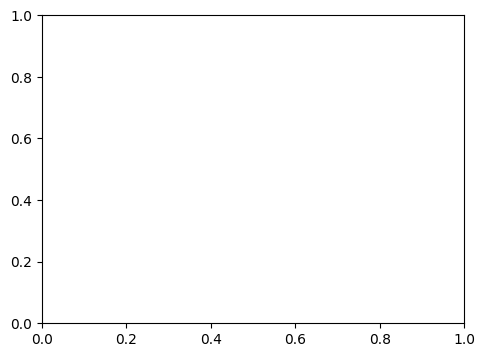

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
